# Project: Investigating Brazil's Medical Appointments Data Set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data set we’re dealing with in this project contains information from 100k medical appointments in Brazil and whether the patient showed up for their appointment or not, also the data set contains some medical information about each patient. In this analysis we will try to answer the question of “What’s the most important factor in deciding whether a patient is going to come to his appointment or not?” also we will try to know if there’s a correlation between Hipertension & Diabetes and Alcoholism or not.
>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


In [3]:
data = pd.read_csv('Brazil.csv')
data.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
data.shape

(110527, 14)

In [5]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
data.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [11]:
sum(data.duplicated())

0

In [12]:
data['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [13]:
np.sort(data['Age'].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [14]:
data[data['Age']== -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


After exploring the data we can state that: 
* There is no duplicates or missing data.
* We will interpret the patient with -ve age as a fetus and her medical status can go with that interpretation.
* 'ScheduledDay' and 'AppointmentDay' columns data type need to be fixed.
* The 'No-show' column is a bit confusing and it'll be more convenient to edit it.
* It'll be helpful to our analysis to add a column for the waiting time between scheduled day  the appointment day.
* It'll be helpful to our analysis to add a column to specify which day of the week was the appointment. 


### Data Cleaning

In [15]:
#Fixing date data types.
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [17]:
data['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [18]:
#Fixing and renaming 'No show' column to make if say 'Yes' if tha patient showed up for the appointment
data['No-show'].replace({'Yes':'No', 'No':'Yes'}, inplace = True)
data.rename(columns = {'No-show' :'Showed'}, inplace = True)

In [19]:
data['Showed'].value_counts()

Yes    88208
No     22319
Name: Showed, dtype: int64

In [20]:
data.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes


In [21]:
#Creating the waiting time column
data['WaitingTime'] = data['AppointmentDay'] - data['ScheduledDay'].dt.normalize()

In [22]:
np.sort(data['WaitingTime'].unique())

array([ -518400000000000,   -86400000000000,                 0,
          86400000000000,   172800000000000,   259200000000000,
         345600000000000,   432000000000000,   518400000000000,
         604800000000000,   691200000000000,   777600000000000,
         864000000000000,   950400000000000,  1036800000000000,
        1123200000000000,  1209600000000000,  1296000000000000,
        1382400000000000,  1468800000000000,  1555200000000000,
        1641600000000000,  1728000000000000,  1814400000000000,
        1900800000000000,  1987200000000000,  2073600000000000,
        2160000000000000,  2246400000000000,  2332800000000000,
        2419200000000000,  2505600000000000,  2592000000000000,
        2678400000000000,  2764800000000000,  2851200000000000,
        2937600000000000,  3024000000000000,  3110400000000000,
        3196800000000000,  3283200000000000,  3369600000000000,
        3456000000000000,  3542400000000000,  3628800000000000,
        3715200000000000,  3801600000000

In [23]:
data[data['WaitingTime'] < '0 days']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed,WaitingTime
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,No,-1 days
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,No,-1 days
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,No,-1 days
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,No,-6 days
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,No,-1 days


In [24]:
#Droping appointments with -ve waiting time
data.drop(data[data['WaitingTime'] < '0 days'].index, inplace = True)

In [25]:
data.shape

(110522, 15)

In [26]:
#Adding Day Column
data['Day'] = data['AppointmentDay'].dt.day_name()

In [27]:
data['Day'].unique()

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'],
      dtype=object)

In [28]:
#Rearranging the data set columns
data = data[['PatientId', 'AppointmentID', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'ScheduledDay',
       'AppointmentDay','WaitingTime', 'Day', 'Showed']]

In [29]:
data.head(1)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledDay,AppointmentDay,WaitingTime,Day,Showed
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0 days,Friday,Yes


<a id='eda'></a>
## Exploratory Data Analysis



### “What’s the most important factor in predicting whether a patient is going to show up for their appointment or not?”

In [34]:
data['Showed'].value_counts(normalize=True)

Yes    0.798104
No     0.201896
Name: Showed, dtype: float64

The 'Showed' function takes a column and return a series with the probability of showing up for every unique value in that column.

In [35]:
def Showed(column):
    ser = data.groupby(column)['Showed'].value_counts(normalize=True)
    ser.drop('No',level = 'Showed', inplace = True)
    ser = ser.droplevel('Showed')
    return ser

#### Does the Patient's Gender Play a Role?


In [39]:
Gender = Showed('Gender')
Gender

Gender
F    0.796887
M    0.800362
Name: Showed, dtype: float64

According to the data ther's no significant rule for gender in predicting whether a patient is going to show up for their appointment or not.

#### Does the Patient's Age Play a  Role?


In [41]:
Ages = Showed('Age')
Ages

Age
-1      1.000000
 0      0.819441
 1      0.817422
 2      0.844252
 3      0.816920
          ...   
 98     0.833333
 99     1.000000
 100    1.000000
 102    1.000000
 115    0.400000
Name: Showed, Length: 104, dtype: float64

In [43]:
mask0 = data['Age'].value_counts() > 1000

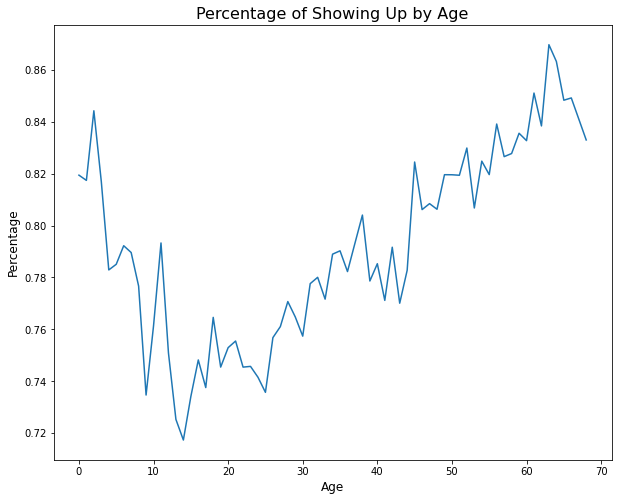

In [44]:
plt.figure(figsize = (10,8));
plt.plot(Ages[mask0]);
plt.title('Percentage of Showing Up by Age', fontdict={'fontsize':16});
plt.xlabel('Age',fontdict={'fontsize':12});
plt.ylabel('Percentage',fontdict={'fontsize':12});

According to the data set:
* Children are more likely to sgow up for the appointment
* For patients older than 10, showing up is directly proportional to the age.

#### Does the Patient's Neighbourhood Play a  Role?

In [45]:
Neighbourhoods = Showed('Neighbourhood')
Neighbourhoods

Neighbourhood
AEROPORTO              0.875000
ANDORINHAS             0.769673
ANTÔNIO HONÓRIO        0.815498
ARIOVALDO FAVALESSA    0.780142
BARRO VERMELHO         0.784870
                         ...   
SÃO JOSÉ               0.783510
SÃO PEDRO              0.789624
TABUAZEIRO             0.817311
UNIVERSITÁRIO          0.789474
VILA RUBIM             0.834313
Name: Showed, Length: 80, dtype: float64

In [46]:
Neighbourhoods.sort_values(ascending = False, inplace = True)
Neighbourhoods

Neighbourhood
PARQUE INDUSTRIAL    1.000000
ILHA DO BOI          0.914286
AEROPORTO            0.875000
MÁRIO CYPRESTE       0.854447
SOLON BORGES         0.852878
                       ...   
JESUS DE NAZARETH    0.756046
ITARARÉ              0.737336
SANTA CLARA          0.735178
SANTA CECÍLIA        0.725446
SANTOS DUMONT        0.710815
Name: Showed, Length: 80, dtype: float64

In [47]:
mask1 = data['Neighbourhood'].value_counts() > 1000

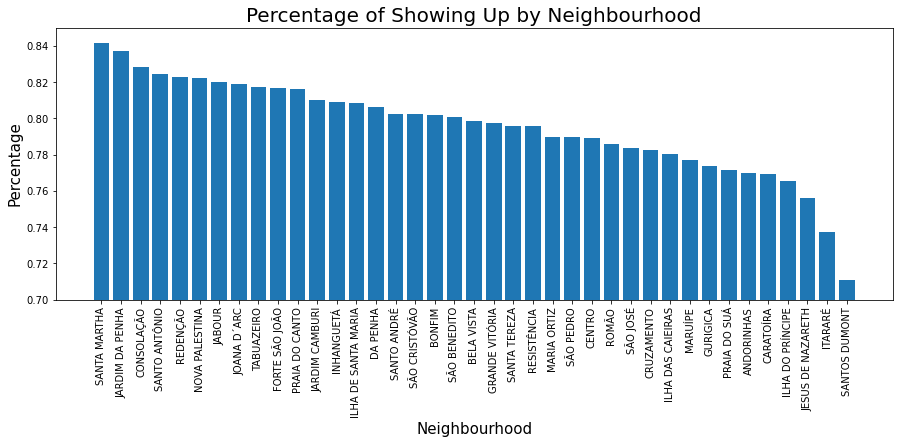

In [48]:
plt.figure(figsize = (15,5));
plt.bar(Neighbourhoods[mask1].index,Neighbourhoods[mask1]);
plt.title('Percentage of Showing Up by Neighbourhood', fontdict={'fontsize':20});
plt.xlabel('Neighbourhood',fontdict={'fontsize':15});
plt.ylabel('Percentage',fontdict={'fontsize':15});
plt.xticks(rotation = 90);
plt.ylim(0.7, 0.85); 


According to the data set the patient's neighbourhood is a good predictor of whether he's going to show up for his appointment or not. 

#### Does Being Enrolled in Brasilian Welfare Program 'Bolsa Família' plays a  Role?

In [50]:
Scholarship = Showed('Scholarship')
Scholarship

Scholarship
0    0.801969
1    0.762637
Name: Showed, dtype: float64

Against what was expected, people whom are not enrolled in the 'Bolsa Família' program have a slightly higher propability to show up for their appointment. 

#### Does Having Hipertension Plays a  Role?

In [51]:
Hipertension = Showed('Hipertension')
Hipertension

Hipertension
0    0.791008
1    0.826980
Name: Showed, dtype: float64

People with Hipertension have a slightly higher propability to show up for their appointment. 

#### Does Having Diabetes Plays a  Role?

In [52]:
Diabetes = Showed('Diabetes')
Diabetes

Diabetes
0    0.796411
1    0.819967
Name: Showed, dtype: float64

People with Diabetes have a slightly higher propability to show up for their appointment. 

#### Does Being Alcoholic Plays a  Role?

In [53]:
Alcoholism = Showed('Alcoholism')
Alcoholism

Alcoholism
0    0.798091
1    0.798512
Name: Showed, dtype: float64

Alcoholism does not play a role in whether a patient is going to show up for ther appointment or not.

#### Does being Handcap Plays a  Role?

In [54]:
Handcap = Showed('Handcap')
Handcap

Handcap
0    0.797669
1    0.821569
2    0.797814
3    0.769231
4    0.666667
Name: Showed, dtype: float64

Although the Handcap sample is not big enough to draw a definite conclusion but it seems that people with more severe handcap condition are less probable to show up for their appointment, that's maybe due to difficulty in reaching the hospitls.

#### Does receiving SMS Plays a  Role?


In [55]:
SMS_received = Showed('SMS_received')
SMS_received

SMS_received
0    0.833022
1    0.724255
Name: Showed, dtype: float64

Against what was expected, people whom did not receive SMS have a slightly higher propability to show up for their appointment, that's maybe bacause SMS are only sent when the appointment is 4 days later, maybe the real factor is the waiting time not whether or not an SMS is recevied. That will be known in a following section. 

#### Does The Appointment Day Plays a Role?


In [56]:
Day = Showed('Day')
Day

Day
Friday       0.787739
Monday       0.793563
Saturday     0.769231
Thursday     0.806506
Tuesday      0.799126
Wednesday    0.803139
Name: Showed, dtype: float64

Patients with appointments on Saturdays are more liely to miss their appontments.

#### Does The Waiting Time Plays a Role?


In [58]:
WaitingTime = Showed('WaitingTime')
WaitingTime

WaitingTime
0 days      0.953531
1 days      0.786495
2 days      0.761784
3 days      0.764706
4 days      0.767297
              ...   
155 days    0.400000
162 days    0.818182
169 days    0.875000
176 days    0.625000
179 days    0.800000
Name: Showed, Length: 124, dtype: float64

In [59]:
mask2 = data['WaitingTime'].value_counts() > 1000

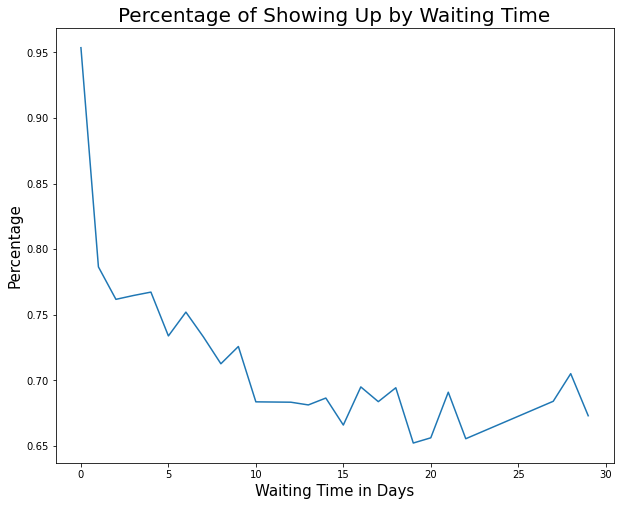

In [60]:
plt.figure(figsize = (10,8));
plt.plot(WaitingTime[mask2].index.astype(int)/86400000000000, WaitingTime[mask2]);
plt.title('Percentage of Showing Up by Waiting Time', fontdict={'fontsize':20});
plt.xlabel('Waiting Time in Days',fontdict={'fontsize':15});
plt.ylabel('Percentage',fontdict={'fontsize':15});

It's clear from the data that the sooner the appointment the higher the probability that the patient is going to show up for the appointment. This could be due to the fact that the emergency cases are scheduled sooner (0 days showing up rate is more than 95%)

### What's the correlation between Hipertension & Diabetes and Alcoholism


#### Hipertension & Diabetes relation

In [61]:
data['Hipertension'].value_counts(normalize=True)

0    0.802745
1    0.197255
Name: Hipertension, dtype: float64

In [62]:
data['Diabetes'].value_counts(normalize=True)

0    0.928132
1    0.071868
Name: Diabetes, dtype: float64

In [63]:
data.groupby('Hipertension')['Diabetes'].value_counts(normalize=True)

Hipertension  Diabetes
0             0           0.983578
              1           0.016422
1             0           0.702491
              1           0.297509
Name: Diabetes, dtype: float64

In [64]:
data.groupby('Diabetes')['Hipertension'].value_counts(normalize=True)

Diabetes  Hipertension
0         0               0.850700
          1               0.149300
1         1               0.816568
          0               0.183432
Name: Hipertension, dtype: float64

According to this data set:
* Patients with Hipertension are 18 times more likely to have Diabetes.
* Patients with Diabetes are 5 times more likely to have Hipertension.

#### Does Alcohol Causes Hipertension or Diabetes?

In [65]:
data.groupby('Alcoholism')['Hipertension'].value_counts(normalize=True)

Alcoholism  Hipertension
0           0               0.808943
            1               0.191057
1           0               0.605060
            1               0.394940
Name: Hipertension, dtype: float64

In [66]:
data.groupby('Alcoholism')['Diabetes'].value_counts(normalize=True)*100

Alcoholism  Diabetes
0           0           92.897669
            1            7.102331
1           0           90.119048
            1            9.880952
Name: Diabetes, dtype: float64

According to this data set:
* Alcoholic people are about twice as likely to have Hipertension.
* Alcoholic people are slightly more likely to have Diabetes.

<a id='conclusions'></a>
## Conclusions

These are the main limitations in this investigation:
* There was no information about the medical specialization of each appointment.
* There was not enough information about the handcap patients.
* No sufficient handicapped patients entries.

These are the main findings of our invastigations:
* There are many factort which can be used to predict whether a patient is going to show up for his aapointment or not but the most significant one is the waiting time for the appointment, patient's age and his neighbourhood.
* Patients with Hipertension are 18 times more likely to have Diabetes that people with no hipertension.
* Patients with Diabetes are 5 times more likely to have Hipertension.
* Alcoholic people have double the chance of having Hipertension than non-Alcoholic people.

